In [41]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
abs(-2)

2

In [3]:
max(1, 2, 3)

3

In [4]:
100 * (9/5) + 32

212.0

In [5]:
0 * (9/5) + 32

32.0

In [6]:
21 * (9/5) + 32

69.80000000000001

In [43]:
def fahrenheit(x):
    return x * (9/5) + 32

In [8]:
fahrenheit(100)

212.0

In [9]:
fahrenheit(0)

32.0

In [10]:
y = 100
fahrenheit(y/4)

77.0

In [11]:
x

NameError: name 'x' is not defined

In [16]:
x

25

In [20]:
counts = make_array(1, 2, 3)
total = counts.sum()
np.round(counts / total * 100, 2)

array([ 16.67,  33.33,  50.  ])

In [29]:
def percents(counts):
    """ Converts counts to percents out of the total. """
    total = counts.sum()
    return np.round(counts / total * 100, 3)

In [30]:
percents(make_array(2, 4, 6))

array([ 16.667,  33.333,  50.   ])

In [36]:
def percents(counts, decimal_places=2):
    """ Converts counts to percents out of the total. """
    total = counts.sum()
    return np.round(counts / total * 100, decimal_places)

In [37]:
percents(make_array(2, 4, 6))

array([ 16.67,  33.33,  50.  ])

In [39]:
percents(make_array(1, 3, 10))

array([  7.14,  21.43,  71.43])

In [38]:
percents(make_array(2, 4, 6), 1)

array([ 16.7,  33.3,  50. ])

## Apply

In [45]:
def cut_off_at_a_billion(x):
    '''The smaller of x and 1,000,000,000'''
    return min(x, 1e9)

In [46]:
cut_off_at_a_billion(123)

123

In [47]:
cut_off_at_a_billion(1230000000000000)

1000000000.0

In [48]:
top = Table.read_table('http://inferentialthinking.com/notebooks/top_movies.csv').where('Studio', 'Fox')
top

Title,Studio,Gross,Gross (Adjusted),Year
Avatar,Fox,760507625,846120800,2009
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005
Star Wars: Episode II - Attack of the Clones,Fox,310676740,465175700,2002
Return of the Jedi,Fox,309306177,818316900,1983
Independence Day,Fox,306169268,602639200,1996
The Empire Strikes Back,Fox,290475067,854171500,1980
Home Alone,Fox,285761243,589287500,1990
Night at the Museum,Fox,250863268,322261900,2006


In [52]:
cut_off_at_a_billion(top.column(3).item(0))

846120800

In [53]:
cut_off_at_a_billion(top.column(3))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [57]:
cut_off_at_a_billion(123000000000)

1000000000.0

In [55]:
cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
cut_off

array([  8.46120800e+08,   7.85715000e+08,   1.00000000e+09,
         5.16123900e+08,   4.65175700e+08,   8.18316900e+08,
         6.02639200e+08,   8.54171500e+08,   5.89287500e+08,
         3.22261900e+08,   3.64479500e+08,   4.58354100e+08,
         3.26064000e+08,   3.64091400e+08,   1.00000000e+09,
         5.33968300e+08,   4.79104000e+08,   3.28182900e+08,
         3.34062200e+08,   6.13853300e+08,   3.97131200e+08,
         4.77647100e+08,   4.67052600e+08,   3.46595500e+08,
         5.84496100e+08,   5.69454500e+08])

In [56]:
top.with_column('Cut Off', cut_off)

Title,Studio,Gross,Gross (Adjusted),Year,Cut Off
Avatar,Fox,760507625,846120800,2009,8.46121e+08
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999,7.85715e+08
Star Wars,Fox,460998007,1549640500,1977,1e+09
Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005,5.16124e+08
Star Wars: Episode II - Attack of the Clones,Fox,310676740,465175700,2002,4.65176e+08
Return of the Jedi,Fox,309306177,818316900,1983,8.18317e+08
Independence Day,Fox,306169268,602639200,1996,6.02639e+08
The Empire Strikes Back,Fox,290475067,854171500,1980,8.54172e+08
Home Alone,Fox,285761243,589287500,1990,5.89288e+08
Night at the Museum,Fox,250863268,322261900,2006,3.22262e+08


In [59]:
type(cut_off_at_a_billion)

function

In [60]:
cut_off_at_a_billion?

## Predictions

In [61]:
galton = Table.read_table('http://inferentialthinking.com/notebooks/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


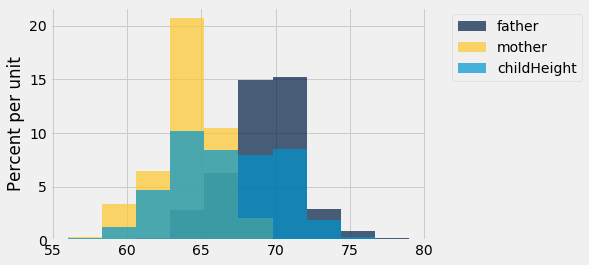

In [62]:
galton.select(1, 2, 7).hist()

In [65]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


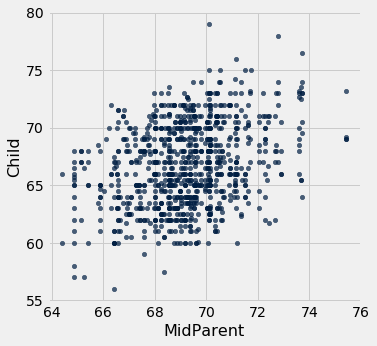

In [66]:
heights.scatter(0)

In [68]:
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [69]:
close_to_68.column('Child').mean()

66.24045801526718

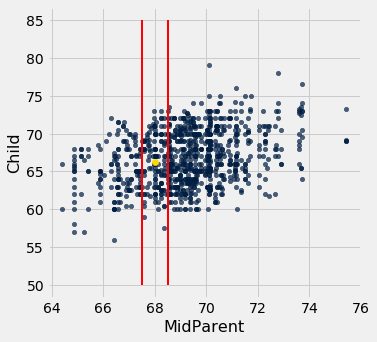

In [71]:
heights.scatter('MidParent')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plots.scatter(68, 66.24, color='gold', s=40)

In [72]:
def predict_child(mp):
    close = heights.where('MidParent', are.between(mp - 0.5, mp + 0.5))
    return close.column('Child').mean()

In [74]:
predict_child(70)

67.272850678733022

In [ ]:
heights_with_predictions = heights.with_columns(
    'Prediction', heights.apply(predict_child, 'MidParent')
)
heights_with_predictions